In [6]:

import tensorflow as tf

In [1]:
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
print(len(train_images))
print(len(train_labels))

60000
60000


In [4]:
print(len(test_images))
print(len(test_labels))

10000
10000


In [5]:
print(test_images.shape)
train_images.shape

(10000, 28, 28)


(60000, 28, 28)

# digit.shape¶
plt.imshow(digit, cmap=plt.cm.binary) plt.show()

Class Label: 0


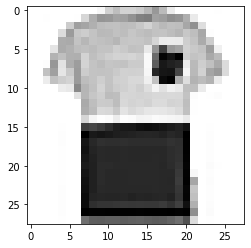

In [7]:
import matplotlib.pyplot as plt
digit = test_images[120]
print("Class Label:",test_labels[120])
#digit.shape

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [8]:
import numpy as np
print(train_labels)
print(np.unique(train_labels))

[9 0 0 ... 3 0 5]
[0 1 2 3 4 5 6 7 8 9]


# Listing 2.2 The network architecture

# AND Listing 2.3 The compilation step

In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()


network.add(layers.Dense(512, activation='relu', input_shape=(28*28, )))
network.add(layers.Dense(10, activation='softmax'))

In [10]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [11]:
train_images.ndim

3

In [12]:
50/255

0.19607843137254902

# Listing 2.4 Preparing the image data

In [13]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255 #Normalization


test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255 #Normalization

# Listing 2.5 Preparing the labels

In [14]:
train_labels[0]

9

# One-Hot-Encoding

In [15]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [16]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Now Train your Model

In [17]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 7s 14ms/step - loss: 0.7401 - accuracy: 0.7484
Epoch 2/5
469/469 [==============================] - 7s 15ms/step - loss: 0.3919 - accuracy: 0.8550
Epoch 3/5
469/469 [==============================] - 6s 14ms/step - loss: 0.3326 - accuracy: 0.8771
Epoch 4/5
469/469 [==============================] - 6s 13ms/step - loss: 0.3168 - accuracy: 0.8838
Epoch 5/5
469/469 [==============================] - 6s 13ms/step - loss: 0.2922 - accuracy: 0.8943


In [18]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)


313/313 [==============================] - 1s 3ms/step - loss: 0.3450 - accuracy: 0.8781
test_acc: 0.8780999779701233
